In [127]:
# Загружаем библиотеки
import pandas as pd # Датафреймы pandas
from sklearn.model_selection import train_test_split # Разделение выборки на обучающую и тестовую
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
import sklearn.metrics as metrics # Метрики качества моделей
import matplotlib.pyplot as plt # Графики

In [75]:
# Загружаем исходную информацию
data = pd.read_csv('affair_data.csv')
# Матрица признаков
X = data[data.columns[:-1]]
# Вектор целевых значений
y = data['affair']
# Разделяем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# Обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)
# Прогноз модели по тестовой выборке
predictions = model.predict_proba(X_test)

In [87]:
# Расчёт значений матрицы ошибок
def confusion_matrix(y_test, predictions, threshold):
    # Матрица ошибок
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    # Перебираем пары предсказание - истиннное значение
    for predicted_prob, actual in zip(predictions, y_test):    
        # Порог классификации результата
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        # Расчёт True positive и False positive
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        # Расчёт False negative и True negative   
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return (tp, fp, fn, tn)

In [155]:
# Расчёт для значений порога от 0 до 1 с шагом 0,01
my_thresholds = [x / 100 for x in range(101)]
my_tpr = []
my_fpr = []

# Перебираем пороговые значения и рассчитываем метрики
for threshold in my_thresholds:
    tp, fp, fn, tn = confusion_matrix(y_test, predictions[:, 1], threshold)
    # True Positive Rate
    my_tpr.append(tp / (tp + fn))
    # False Positive Rate
    my_fpr.append(fp / (fp + tn))
    
# Значения fpr и tpr средствами sklearn.metrics
fpr, tpr, thres = metrics.roc_curve(y_test, predictions[:, 1])

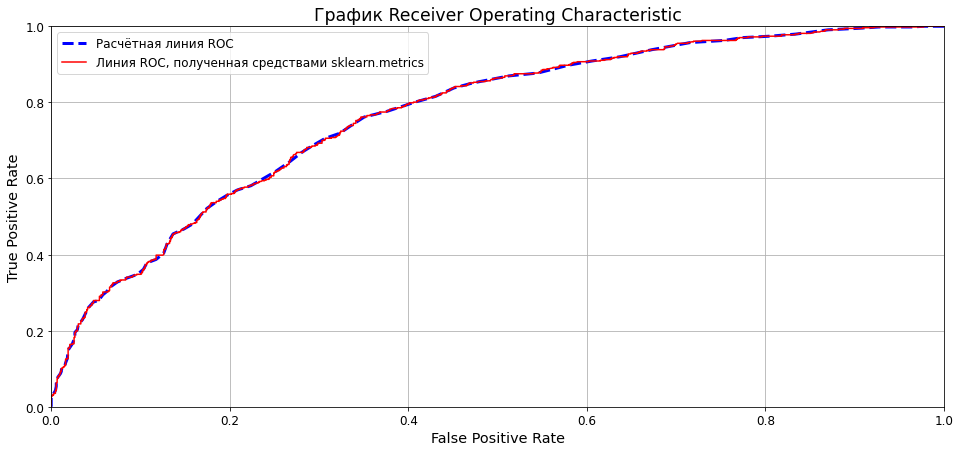

In [169]:
# Сравнение графиков ROC AUC

# Размер поля графика
plt.figure(figsize = (16, 7))

# Графики расчётных значений и полученных средствами sklearn.metrics
plt.plot(my_fpr, my_tpr, color = 'blue', linestyle = '--', linewidth = 3, label = 'Расчётная линия ROC')
plt.plot(fpr, tpr, color = 'red', label = 'Линия ROC, полученная средствами sklearn.metrics')

# Оформление графика
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.tick_params(labelsize = 'large')
plt.xlabel('False Positive Rate', fontsize = 'x-large')
plt.ylabel('True Positive Rate', fontsize = 'x-large')
plt.title('График Receiver Operating Characteristic', fontsize = 'xx-large')
plt.legend(fontsize = 'large')
plt.grid()

plt.show()

In [194]:
# Расчёт для значений порога от 0 до 0.94 с шагом 0,01
my_thresholds = [x / 100 for x in range(95)]
my_pr = []
my_re = []

# Перебираем пороговые значения и рассчитываем метрики
for threshold in my_thresholds:
    tp, fp, fn, tn = confusion_matrix(y_test, predictions[:, 1], threshold)
    # Precision
    my_pr.append(tp / (tp + fp))
    # Recall
    my_re.append(tp / (tp + fn))

# Значения pr и re средствами sklearn.metrics
pr, re, thres = metrics.precision_recall_curve(y_test, predictions[:, 1])

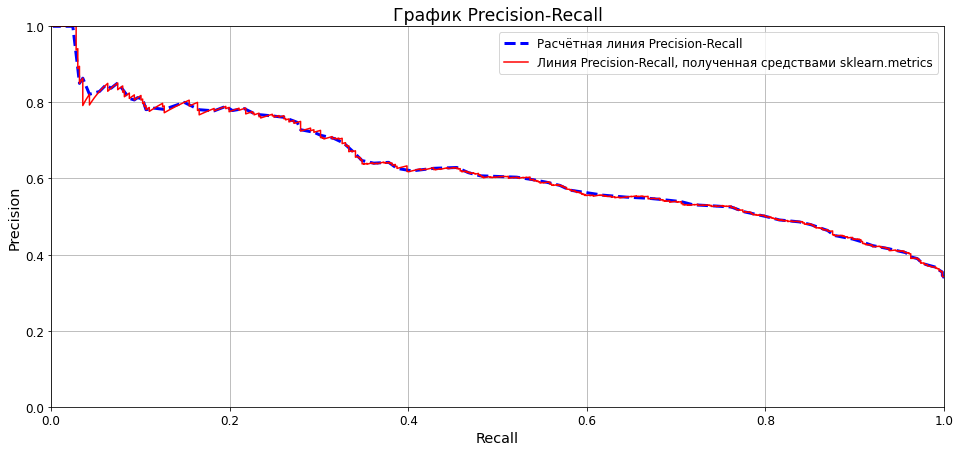

In [195]:
# Сравнение графиков Precision-Recall

# Размер поля графика
plt.figure(figsize = (16, 7))

# Графики расчётных значений и полученных средствами sklearn.metrics
plt.plot(my_re, my_pr, color = 'blue', linestyle = '--', linewidth = 3, label = 'Расчётная линия Precision-Recall')
plt.plot(re, pr, color = 'red', label = 'Линия Precision-Recall, полученная средствами sklearn.metrics')

# Оформление графика
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.tick_params(labelsize = 'large')
plt.xlabel('Recall', fontsize = 'x-large')
plt.ylabel('Precision', fontsize = 'x-large')
plt.title('График Precision-Recall', fontsize = 'xx-large')
plt.legend(fontsize = 'large')
plt.grid()

plt.show()